In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.colors as mcolors

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score, classification_report

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

Load the Dataset`

In [4]:
data = pd.read_csv('../data/housing.csv')

In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


Remove unwanted columns

In [6]:
data = data.drop(['longitude', 'latitude'], axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  int64  
 1   total_rooms         20640 non-null  int64  
 2   total_bedrooms      20433 non-null  float64
 3   population          20640 non-null  int64  
 4   households          20640 non-null  int64  
 5   median_income       20640 non-null  float64
 6   ocean_proximity     20640 non-null  object 
 7   median_house_value  20640 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.3+ MB


In [8]:
data.shape

(20640, 8)

In [9]:
data.size

165120

Mising values handle

In [10]:
# counts the total null values
data.isnull().sum()

housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [11]:
# fill the null values in the total_bedrooms col with the mean value
noNull_data = data['total_bedrooms']


filled_series = noNull_data.fillna(noNull_data.mean())
filled_series.isnull().sum()

data['total_bedrooms'] = filled_series

In [12]:
data.isnull().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [13]:
data.head(20)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


categorical data handle

In [14]:
ocean_proximity_unique = data['ocean_proximity'].unique()
ocean_proximity_unique

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [15]:
cat = data.select_dtypes(exclude=np.number).columns.to_list()
cat

['ocean_proximity']

In [16]:
data[cat].value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
Name: count, dtype: int64

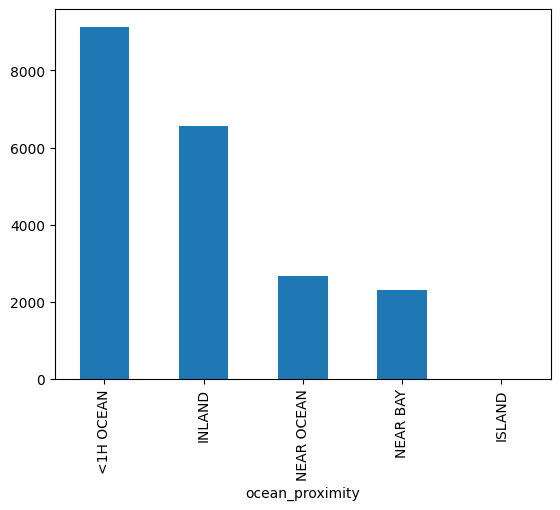

In [17]:
data['ocean_proximity'].value_counts().plot(kind='bar')
plt.show()

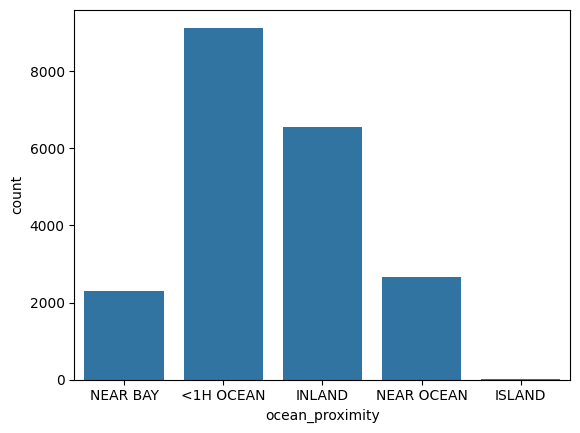

In [18]:
sns.countplot(data=data, x='ocean_proximity')
plt.show()

In [19]:
# map the categorical data
data['ocean_proximity'] = data['ocean_proximity'].map({
    'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2,  'NEAR OCEAN': 3, 'ISLAND': 4
})

In [20]:
data['ocean_proximity'].unique()

array([0, 1, 2, 3, 4])

In [21]:
data['ocean_proximity'].value_counts()

ocean_proximity
1    9136
2    6551
3    2658
0    2290
4       5
Name: count, dtype: int64

In [22]:
data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41,880,129.0,322,126,8.3252,0,452600
1,21,7099,1106.0,2401,1138,8.3014,0,358500
2,52,1467,190.0,496,177,7.2574,0,352100
3,52,1274,235.0,558,219,5.6431,0,341300
4,52,1627,280.0,565,259,3.8462,0,342200


Seperate the train & test data

In [23]:
input_data = data.drop('median_house_value',axis=1)
target_data = data['median_house_value']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.2, random_state=42)

Graphically Data Analysis

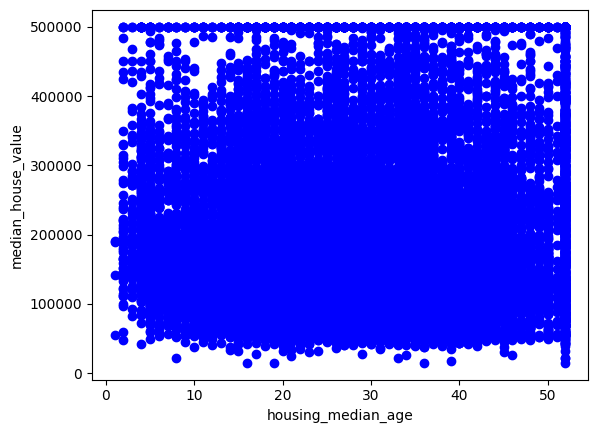

In [25]:
plt.scatter(data.housing_median_age, target_data,  color='blue')
plt.xlabel("housing_median_age")
plt.ylabel("median_house_value")
plt.show()

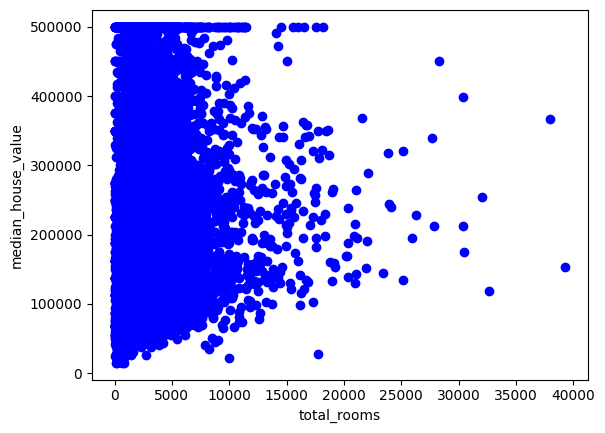

In [26]:
plt.scatter(data.total_rooms, target_data,  color='blue')
plt.xlabel("total_rooms")
plt.ylabel("median_house_value")
plt.show()

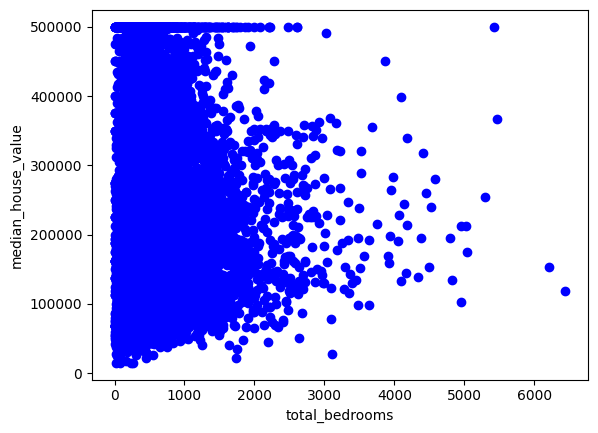

In [27]:
plt.scatter(data.total_bedrooms, target_data,  color='blue')
plt.xlabel("total_bedrooms")
plt.ylabel("median_house_value")
plt.show()

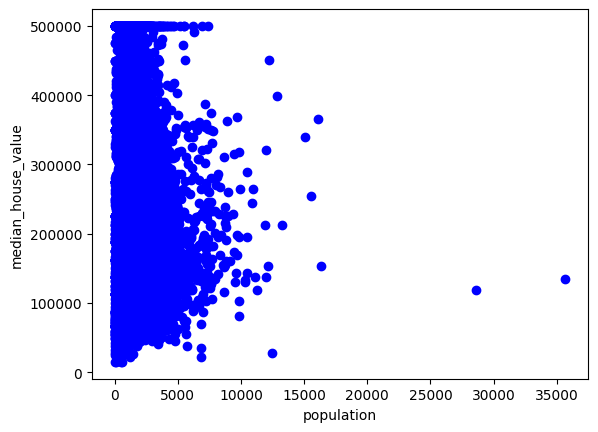

In [28]:
plt.scatter(data.population, target_data,  color='blue')
plt.xlabel("population")
plt.ylabel("median_house_value")
plt.show()

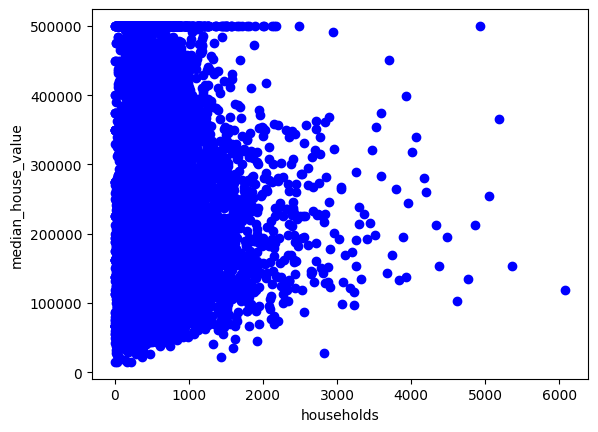

In [29]:
plt.scatter(data.households, target_data,  color='blue')
plt.xlabel("households")
plt.ylabel("median_house_value")
plt.show()

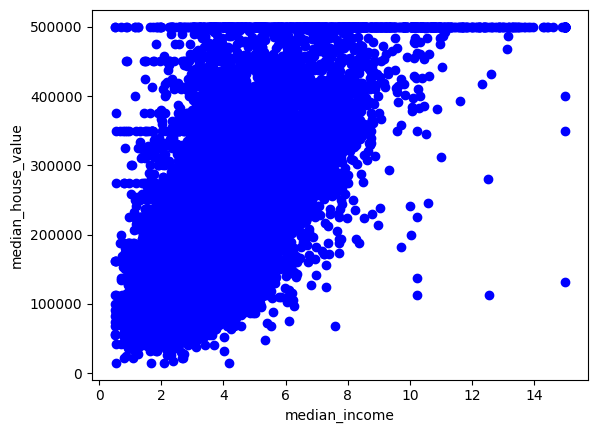

In [30]:
plt.scatter(data.median_income, target_data,  color='blue')
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.show()

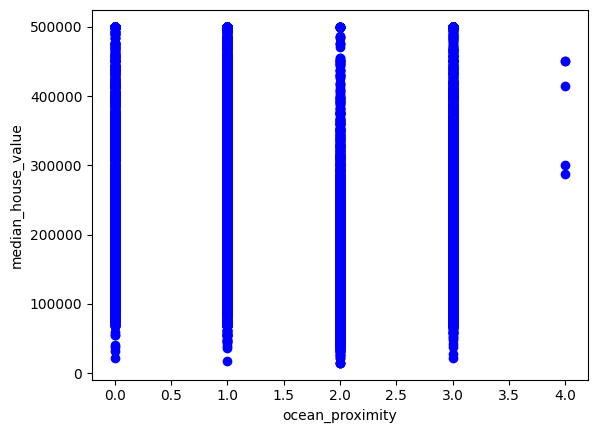

In [31]:
plt.scatter(data.ocean_proximity, target_data,  color='blue')
plt.xlabel("ocean_proximity")
plt.ylabel("median_house_value")
plt.show()

array([[<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'ocean_proximity'}>, <Axes: >, <Axes: >]],
      dtype=object)

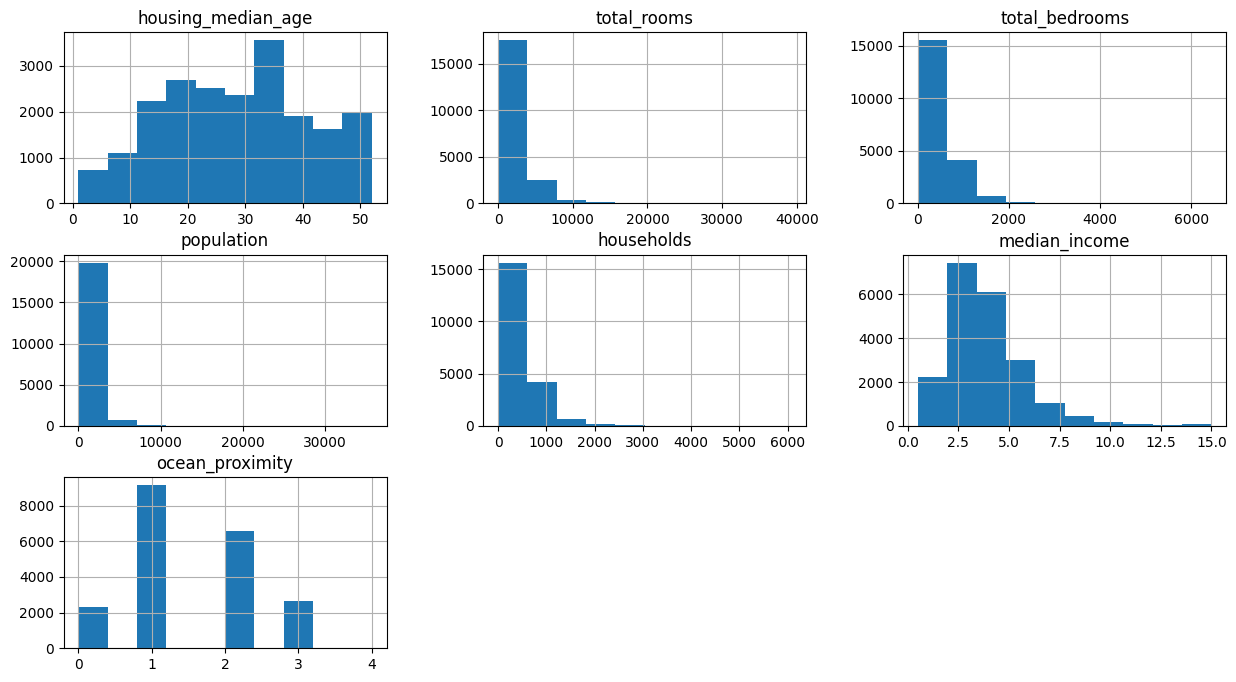

In [32]:
input_data.hist(figsize=(15,8))

In [33]:
input_data.corr()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
housing_median_age,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,-0.204882
total_rooms,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.014818
total_bedrooms,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.004060
population,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.008511
households,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,-0.016911
median_income,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,-0.129135
ocean_proximity,-0.204882,0.014818,0.004060,-0.008511,-0.016911,-0.129135,1.000000


In [34]:
# Define a custom color palette & figure size
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom", ["red", "orange", "yellow", "green", "blue", "purple", "black"])
plt.figure(figsize=(15,8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Axes: >

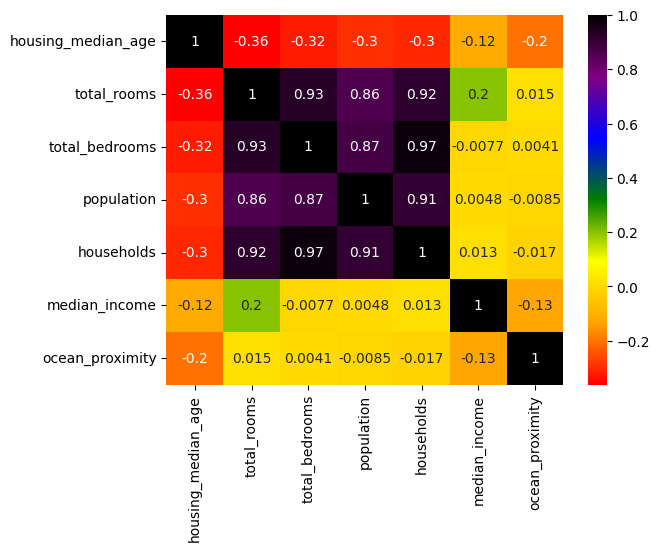

In [35]:
sns.heatmap(input_data.corr(), annot=True, cmap=custom_cmap)

Modeling

In [36]:
def met(name,key,arg):
    print('Name of the model: ',name)
    print('R-square of the model:',r2_score(key,arg))
    print('RMSE of the model:',np.sqrt(mean_squared_error(key,arg)))
    print('MAE of the model:',mean_absolute_error(key,arg))

In [37]:
# LinearRegression

regr = LinearRegression()

regr.fit(x_train, y_train)

LinearRegression()

In [38]:
y_pred_lr = regr.predict(x_test)

met('RFE MODEL and result for train',y_test, y_pred_lr)

Name of the model:  RFE MODEL and result for train
R-square of the model: 0.5471510008792231
RMSE of the model: 77033.58970184834
MAE of the model: 56639.838575024565


In [39]:
rf = RandomForestRegressor()

rf.fit(x_train, y_train)

RandomForestRegressor()

In [40]:
y_pred_rf = rf.predict(x_test)

met('RandomForestRegressor model and result for test', y_test, y_pred_rf)

Name of the model:  RandomForestRegressor model and result for test
R-square of the model: 0.6918457741184159
RMSE of the model: 63545.893988368916
MAE of the model: 44017.80528343023


Predict value for RandomForest

In [41]:
val = [25, 1505, 537.870553, 1392, 359, 1.6812, 2]

In [42]:
predictions = rf.predict([val])
print(int(predictions))

57026


Saving model to disk

In [43]:
import pickle5 as pickle

In [44]:
pickle.dump(rf, open('../ml_model/model.pkl','wb'))

# Loading model to compare the results

In [45]:
model = pickle.load(open('../ml_model/model.pkl','rb'))
result = model.predict([val])
print('The result of the median house value',int(result))

The result of the median house value 57026
